In [1]:
import sys
sys.path.append("../")

In [2]:
from delay.delay import *
import delay.calculator as calc
from delay.strategy import fA_Skew45deg, fB_Skew45deg, showIntervalFunctions
from delay.simulation import Simulation, FunctionType
from delay.regression import linearRegression, Dependence
from delay.value import calculateValue
import pandas as pd

In [3]:
def theOtherLetter(letter):
    return 'd' if letter == 'tau' else 'tau'
def letterToColumnName(letter):
    return 'd' if letter == 'd' else 'τ'
def getN(whichN):
    s = whichN[2:]
    return int(s)

# Linear, step

### N=100

In [4]:
filePrefix = 'lin-step'
%run csvFilename.py
csvFilename = createCSVFilename(filePrefix)
csvFilename

{'N=20': {'ds': {'tau=1': '../csv/N=20/lin-step-ds-tau-1.csv',
   'tau=2': '../csv/N=20/lin-step-ds-tau-2.csv',
   'tau=3': '../csv/N=20/lin-step-ds-tau-3.csv',
   'tau=4': '../csv/N=20/lin-step-ds-tau-4.csv',
   'tau=5': '../csv/N=20/lin-step-ds-tau-5.csv',
   'tau=6': '../csv/N=20/lin-step-ds-tau-6.csv',
   'tau=20': '../csv/N=20/lin-step-ds-tau-20.csv',
   'tau=50': '../csv/N=20/lin-step-ds-tau-50.csv'},
  'taus': {'d=1': '../csv/N=20/lin-step-taus-d-1.csv',
   'd=2': '../csv/N=20/lin-step-taus-d-2.csv',
   'd=3': '../csv/N=20/lin-step-taus-d-3.csv',
   'd=20': '../csv/N=20/lin-step-taus-d-20.csv',
   'd=50': '../csv/N=20/lin-step-taus-d-50.csv',
   'd=150': '../csv/N=20/lin-step-taus-d-150.csv'}},
 'N=100': {'ds': {'tau=1': '../csv/N=100/lin-step-ds-tau-1.csv',
   'tau=2': '../csv/N=100/lin-step-ds-tau-2.csv',
   'tau=3': '../csv/N=100/lin-step-ds-tau-3.csv',
   'tau=4': '../csv/N=100/lin-step-ds-tau-4.csv',
   'tau=5': '../csv/N=100/lin-step-ds-tau-5.csv',
   'tau=6': '../csv/N=10

Mean squared error: 0.02
Variance score (R^2): 0.98
Line: -0.23d + 0.282576


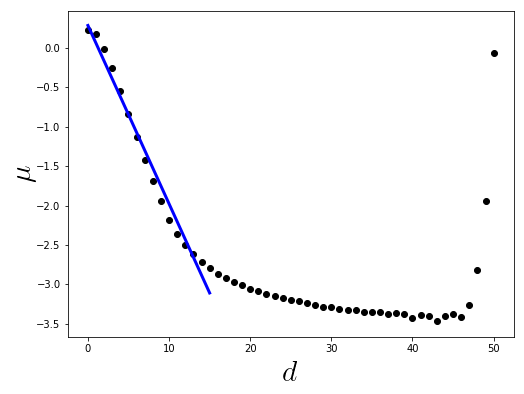

In [8]:
whichN = 'N=100'
whichLetter = 'd'
letterNumber = 20
filename = csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)]
df = pd.read_csv(filename, sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../draft/img/results/'+filePrefix+'/'+whichN+'/d-tau'+str(letterNumber), 
                 smallerThan=15, N=100, showOnlyPointsSmallerThanHalf=True);

Mean squared error: 0.04
Variance score (R^2): 0.99
Line: -0.26d + 0.526424


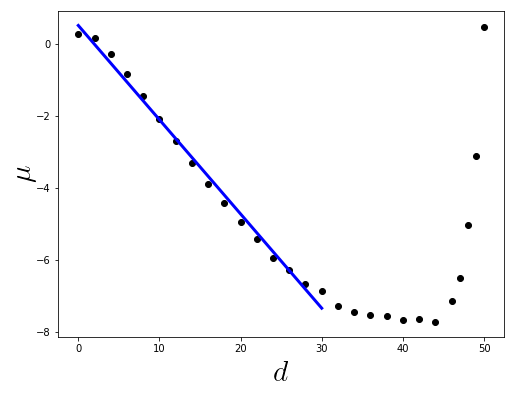

In [5]:
whichN = 'N=100'
whichLetter = 'd'
letterNumber = 50
filename = csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)]
df = pd.read_csv(filename, sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../draft/img/results/'+filePrefix+'/'+whichN+'/d-tau'+str(letterNumber), 
                 smallerThan=30, N=100, showOnlyPointsSmallerThanHalf=True);

Mean squared error: 0.00
Variance score (R^2): 1.00
Line: -0.15τ + -0.036076


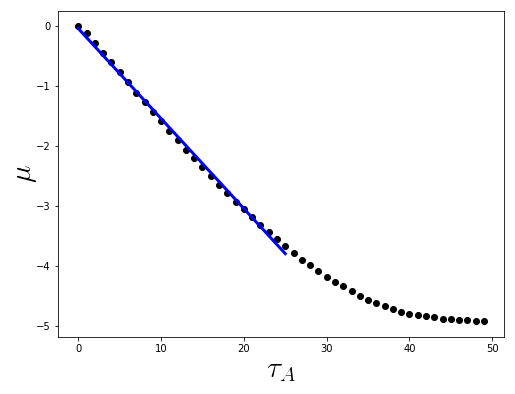

In [19]:
whichN = 'N=100'
whichLetter = 'tau'
letterNumber = 20
filename = csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)]
df = pd.read_csv(filename, sep=',')
toDict = df.to_dict('l')
ds = toDict[letterToColumnName(whichLetter)]
mus = toDict['µ']

linearRegression(ds, mus, Dependence.TAU, '../../draft/img/results/'+filePrefix+'/'+whichN+'/tau-d'+str(letterNumber), 
                 smallerThan=25, N=100, showOnlyPointsSmallerThanHalf=True);

In [17]:
filename

'../csv/N=100/lin-step-ds-tau-50.csv'

### N=300

Mean squared error: 0.08
Variance score (R^2): 0.94
Line: -0.18d + 0.010893


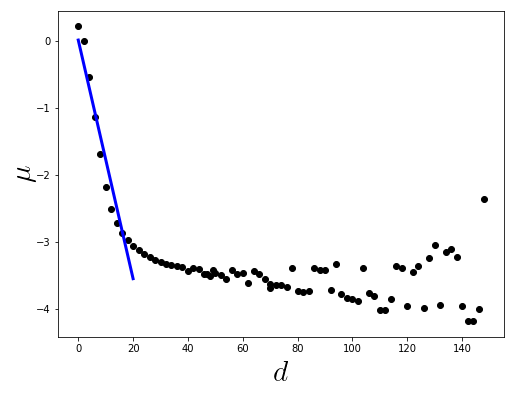

In [5]:
whichN = 'N=300'
whichLetter = 'd'
letterNumber = 20
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../draft/img/results/'+filePrefix+'/'+whichN+'/d-tau'+str(letterNumber)+'-half', smallerThan=20, N=300, showOnlyPointsSmallerThanHalf=True);

Mean squared error: 0.02
Variance score (R^2): 0.99
Line: -0.14τ + -0.169324


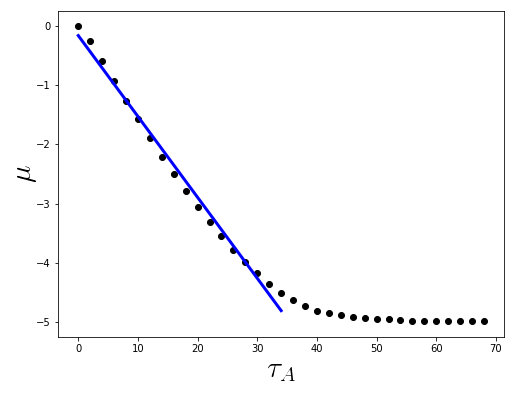

Fig. \ref{fig:lin-step-N300-tau-d20}  shows how $\mu$ depends on $\tau_A$ change for $ d=34 $. The results are for $\tau_A = 0, 2, \ldots, 20$, and $N = 300$. The blue line depicts linear regression fit for $ \tau_A \le 35 $. The trend line is $-0.14\tau_A -0.17$. The coefficient of determination is $r^2 = 0.99$. 


In [57]:
whichN = 'N=300'
whichLetter = 'tau'
letterNumber = 20
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

figName = 'fig:' + filePrefix + '-N' + str(getN(whichN)) + '-tau-d' + str(letterNumber)
regression = linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/tau-d'+str(letterNumber), smallerThan=35);
print('Fig. \\ref{%s}  shows how $\\mu$ depends on $\\tau_A$ change for $ d=%d $. The results are for $\\tau_A = 0, 2, \\ldots, %d$, and $N = %d$. The blue line depicts linear regression fit for $ \\tau_A \le %d $. The trend line is $%.2f\\tau_A %+.2f$. The coefficient of determination is $r^2 = %.2f$. ' % 
        (figName, regression['max'], letterNumber, getN(whichN), regression['upto'], regression['slope'], regression['intercept'], regression['r2']));

Mean squared error: 0.04
Variance score (R^2): 0.99
Line: -0.26d + 0.533785


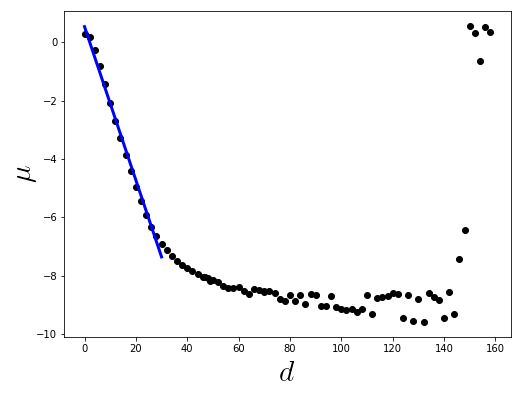

In [100]:
whichN = 'N=300'
whichLetter = 'd'
letterNumber = 50
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/d-tau'+str(letterNumber), smallerThan=30);

Mean squared error: 0.33
Variance score (R^2): 0.98
Line: -0.13τ + -0.900540


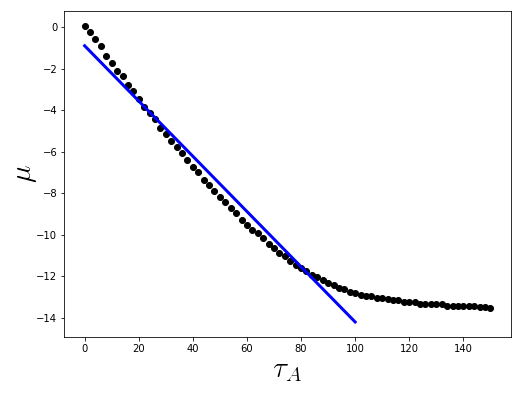

Fig. \ref{fig:lin-step-N300-tau-d50}  shows how $\mu$ depends on $\tau_A$ change for $ d=100 $. The results are for $\tau_A = 0, 2, \ldots, 50$, and $N = 300$. The blue line depicts linear regression fit for $ \tau_A \le 100 $. The trend line is $-0.13\tau_A -0.90$. The coefficient of determination is $r^2 = 0.98$. 


In [59]:
whichN = 'N=300'
whichLetter = 'tau'
letterNumber = 50
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

figName = 'fig:' + filePrefix + '-N' + str(getN(whichN)) + '-tau-d' + str(letterNumber)
regression = linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/tau-d'+str(letterNumber), smallerThan=100);
print('Fig. \\ref{%s}  shows how $\\mu$ depends on $\\tau_A$ change for $ d=%d $. The results are for $\\tau_A = 0, 2, \\ldots, %d$, and $N = %d$. The blue line depicts linear regression fit for $ \\tau_A \le %d $. The trend line is $%.2f\\tau_A %+.2f$. The coefficient of determination is $r^2 = %.2f$. ' % 
        (figName, regression['max'], letterNumber, getN(whichN), regression['upto'], regression['slope'], regression['intercept'], regression['r2']));

### N=500

Mean squared error: 0.08
Variance score (R^2): 0.94
Line: -0.18d + 0.012883


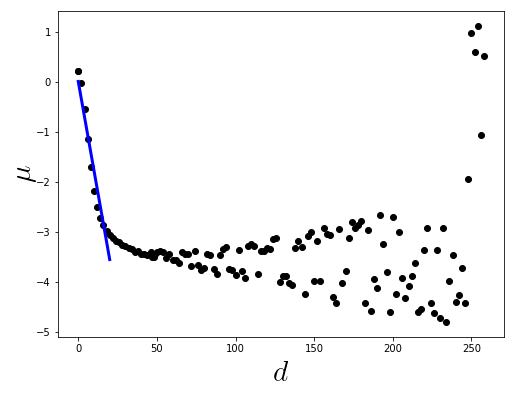

In [102]:
whichN = 'N=500'
whichLetter = 'd'
letterNumber = 20
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/d-tau'+str(letterNumber), smallerThan=20);

Mean squared error: 0.16
Variance score (R^2): 0.94
Line: -0.10τ + -0.617418


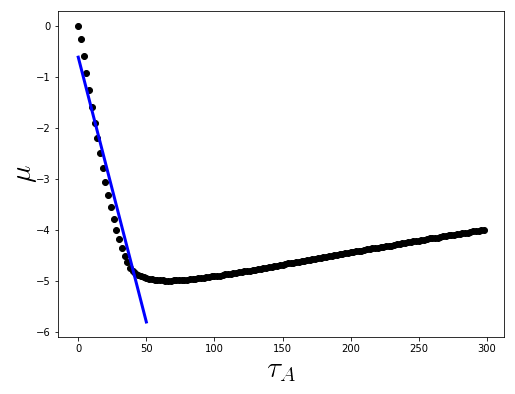

Fig. \ref{fig:lin-step-N500-tau-d20}  shows how $\mu$ depends on $\tau_A$ change for $ d=50 $. The results are for $\tau_A = 0, 2, \ldots, 20$, and $N = 500$. The blue line depicts linear regression fit for $ \tau_A \le 50 $. The trend line is $-0.10\tau_A -0.62$. The coefficient of determination is $r^2 = 0.94$. 


In [61]:
whichN = 'N=500'
whichLetter = 'tau'
letterNumber = 20
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

figName = 'fig:' + filePrefix + '-N' + str(getN(whichN)) + '-tau-d' + str(letterNumber)
regression = linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/tau-d'+str(letterNumber), smallerThan=50);
print('Fig. \\ref{%s}  shows how $\\mu$ depends on $\\tau_A$ change for $ d=%d $. The results are for $\\tau_A = 0, 2, \\ldots, %d$, and $N = %d$. The blue line depicts linear regression fit for $ \\tau_A \le %d $. The trend line is $%.2f\\tau_A %+.2f$. The coefficient of determination is $r^2 = %.2f$. ' % 
        (figName, regression['max'], letterNumber, getN(whichN), regression['upto'], regression['slope'], regression['intercept'], regression['r2']));

Mean squared error: 0.04
Variance score (R^2): 0.99
Line: -0.26d + 0.534670


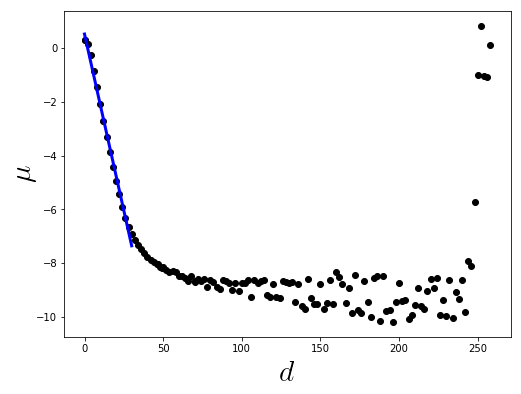

In [103]:
whichN = 'N=500'
whichLetter = 'd'
letterNumber = 50
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/d-tau'+str(letterNumber), smallerThan=30);

Mean squared error: 0.29
Variance score (R^2): 0.98
Line: -0.13τ + -0.847934


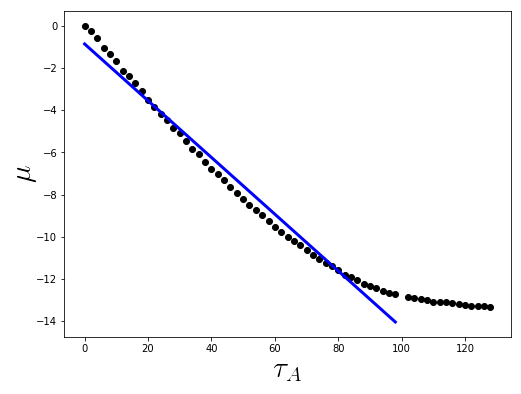

Fig. \ref{fig:lin-step-N500-tau-d50}  shows how $\mu$ depends on $\tau_A$ change for $ d=98 $. The results are for $\tau_A = 0, 2, \ldots, 50$, and $N = 500$. The blue line depicts linear regression fit for $ \tau_A \le 100 $. The trend line is $-0.13\tau_A -0.85$. The coefficient of determination is $r^2 = 0.98$. 


In [63]:
whichN = 'N=500'
whichLetter = 'tau'
letterNumber = 50
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

figName = 'fig:' + filePrefix + '-N' + str(getN(whichN)) + '-tau-d' + str(letterNumber)
regression = linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/tau-d'+str(letterNumber), smallerThan=100);
print('Fig. \\ref{%s}  shows how $\\mu$ depends on $\\tau_A$ change for $ d=%d $. The results are for $\\tau_A = 0, 2, \\ldots, %d$, and $N = %d$. The blue line depicts linear regression fit for $ \\tau_A \le %d $. The trend line is $%.2f\\tau_A %+.2f$. The coefficient of determination is $r^2 = %.2f$. ' % 
        (figName, regression['max'], letterNumber, getN(whichN), regression['upto'], regression['slope'], regression['intercept'], regression['r2']));

Mean squared error: 1.16
Variance score (R^2): 0.99
Line: -0.15τ + -1.755119


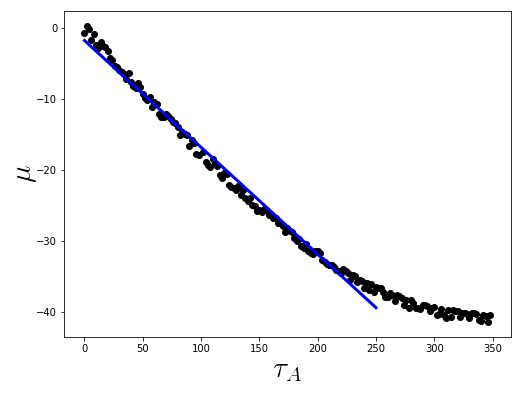

Fig. \ref{fig:lin-step-N500-tau-d150}  shows how $\mu$ depends on $\tau_A$ change for $ d=250 $. The results are for $\tau_A = 0, 2, \ldots, 150$, and $N = 500$. The blue line depicts linear regression fit for $ \tau_A \le 348 $. The trend line is $-0.15\tau_A -1.76$. The coefficient of determination is $r^2 = 0.99$. 


In [64]:
whichN = 'N=500'
whichLetter = 'tau'
letterNumber = 150
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

figName = 'fig:' + filePrefix + '-N' + str(getN(whichN)) + '-tau-d' + str(letterNumber)
regression = linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/tau-d'+str(letterNumber), forHalfN=True, N=500);
print('Fig. \\ref{%s}  shows how $\\mu$ depends on $\\tau_A$ change for $ d=%d $. The results are for $\\tau_A = 0, 2, \\ldots, %d$, and $N = %d$. The blue line depicts linear regression fit for $ \\tau_A \le %d $. The trend line is $%.2f\\tau_A %+.2f$. The coefficient of determination is $r^2 = %.2f$. ' % 
        (figName, regression['max'], letterNumber, getN(whichN), regression['upto'], regression['slope'], regression['intercept'], regression['r2']));

# Linear, skewTo0

### N=100

In [104]:
filePrefix = 'lin-skewTo0'
%run csvFilename.py
csvFilename = createCSVFilename(filePrefix)
csvFilename

{'N=100': {'ds': {'tau=20': '../../csv/N=100/lin-skewTo0-ds-tau20.csv',
   'tau=50': '../../csv/N=100/lin-skewTo0-ds-tau50.csv'},
  'taus': {'d=20': '../../csv/N=100/lin-skewTo0-taus-d20.csv',
   'd=50': '../../csv/N=100/lin-skewTo0-taus-d50.csv',
   'd=150': '../../csv/N=100/lin-skewTo0-taus-d150.csv'}},
 'N=300': {'ds': {'tau=20': '../../csv/N=300/lin-skewTo0-ds-tau20.csv',
   'tau=50': '../../csv/N=300/lin-skewTo0-ds-tau50.csv'},
  'taus': {'d=20': '../../csv/N=300/lin-skewTo0-taus-d20.csv',
   'd=50': '../../csv/N=300/lin-skewTo0-taus-d50.csv',
   'd=150': '../../csv/N=300/lin-skewTo0-taus-d150.csv'}},
 'N=500': {'ds': {'tau=20': '../../csv/N=500/lin-skewTo0-ds-tau20.csv',
   'tau=50': '../../csv/N=500/lin-skewTo0-ds-tau50.csv'},
  'taus': {'d=20': '../../csv/N=500/lin-skewTo0-taus-d20.csv',
   'd=50': '../../csv/N=500/lin-skewTo0-taus-d50.csv',
   'd=150': '../../csv/N=500/lin-skewTo0-taus-d150.csv'}}}

Mean squared error: 0.04
Variance score (R^2): 0.98
Line: -0.12d + 0.142484


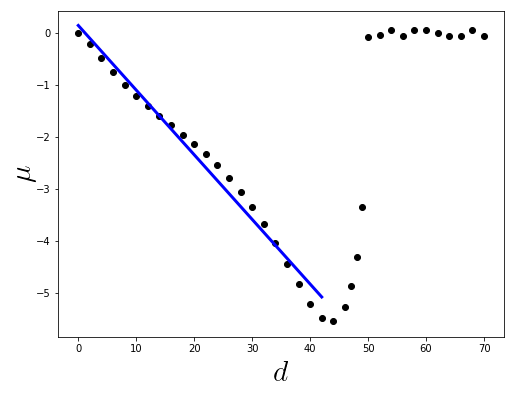

In [66]:
whichN = 'N=100'
whichLetter = 'd'
letterNumber = 50
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/d-tau'+str(letterNumber), forHalfN=True, N=100);

### N=300

Mean squared error: 0.08
Variance score (R^2): 0.57
Line: -0.01d + 0.009809


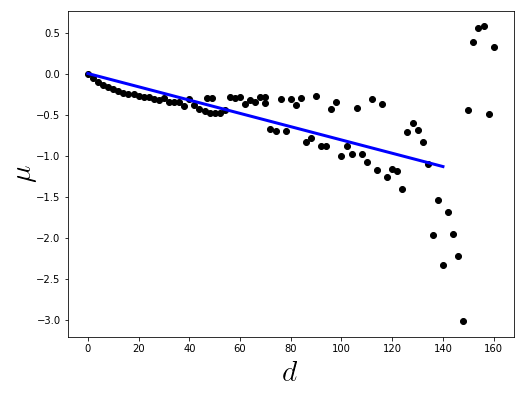

In [105]:
whichN = 'N=300'
whichLetter = 'd'
letterNumber = 20
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/d-tau'+str(letterNumber), smallerThan=140);

Mean squared error: 0.00
Variance score (R^2): 1.00
Line: -0.01τ + 0.024990


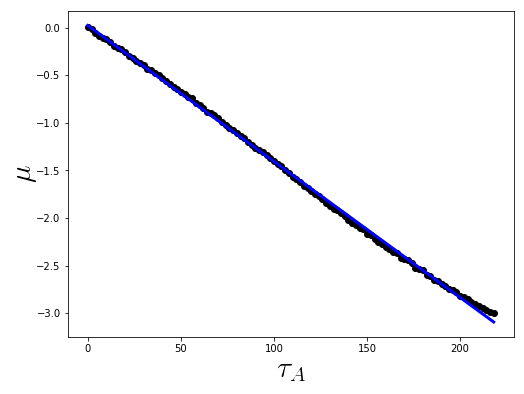

Fig. \ref{fig:lin-skewTo0-N300-tau-d20}  shows how $\mu$ depends on $\tau_A$ change for $ d=218 $. The results are for $\tau_A = 0, 2, \ldots, 20$, and $N = 300$. The blue line depicts linear regression fit for $ \tau_A \le 218 $. The trend line is $-0.01\tau_A +0.02$. The coefficient of determination is $r^2 = 1.00$. 


In [68]:
whichN = 'N=300'
whichLetter = 'tau'
letterNumber = 20
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

figName = 'fig:' + filePrefix + '-N' + str(getN(whichN)) + '-tau-d' + str(letterNumber)
regression = linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/tau-d'+str(letterNumber));
print('Fig. \\ref{%s}  shows how $\\mu$ depends on $\\tau_A$ change for $ d=%d $. The results are for $\\tau_A = 0, 2, \\ldots, %d$, and $N = %d$. The blue line depicts linear regression fit for $ \\tau_A \le %d $. The trend line is $%.2f\\tau_A %+.2f$. The coefficient of determination is $r^2 = %.2f$. ' % 
        (figName, regression['max'], letterNumber, getN(whichN), regression['upto'], regression['slope'], regression['intercept'], regression['r2']));

Mean squared error: 0.33
Variance score (R^2): 0.76
Line: -0.03d + 0.173332


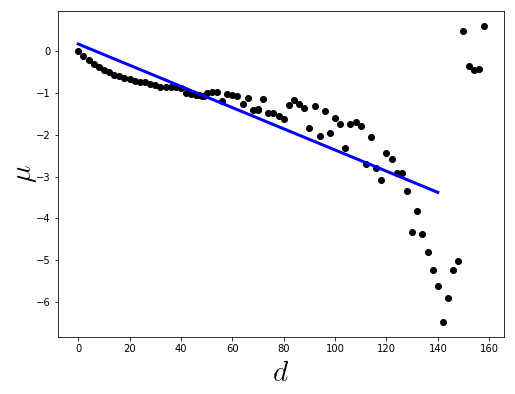

In [106]:
whichN = 'N=300'
whichLetter = 'd'
letterNumber = 50
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/d-tau'+str(letterNumber), smallerThan=140);

Mean squared error: 0.02
Variance score (R^2): 1.00
Line: -0.03τ + 0.474791


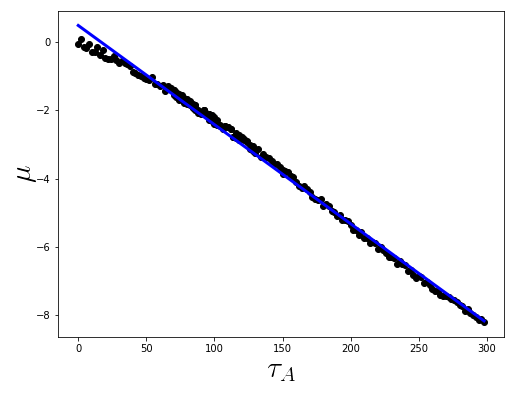

Fig. \ref{fig:lin-skewTo0-N300-tau-d50}  shows how $\mu$ depends on $\tau_A$ change for $ d=298 $. The results are for $\tau_A = 0, 2, \ldots, 50$, and $N = 300$. The blue line depicts linear regression fit for $ \tau_A \le 298 $. The trend line is $-0.03\tau_A +0.47$. The coefficient of determination is $r^2 = 1.00$. 


In [70]:
whichN = 'N=300'
whichLetter = 'tau'
letterNumber = 50
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

figName = 'fig:' + filePrefix + '-N' + str(getN(whichN)) + '-tau-d' + str(letterNumber)
regression = linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/tau-d'+str(letterNumber));
print('Fig. \\ref{%s}  shows how $\\mu$ depends on $\\tau_A$ change for $ d=%d $. The results are for $\\tau_A = 0, 2, \\ldots, %d$, and $N = %d$. The blue line depicts linear regression fit for $ \\tau_A \le %d $. The trend line is $%.2f\\tau_A %+.2f$. The coefficient of determination is $r^2 = %.2f$. ' % 
        (figName, regression['max'], letterNumber, getN(whichN), regression['upto'], regression['slope'], regression['intercept'], regression['r2']));

### N=500

Mean squared error: 0.18
Variance score (R^2): 0.11
Line: -0.00d + -0.073193


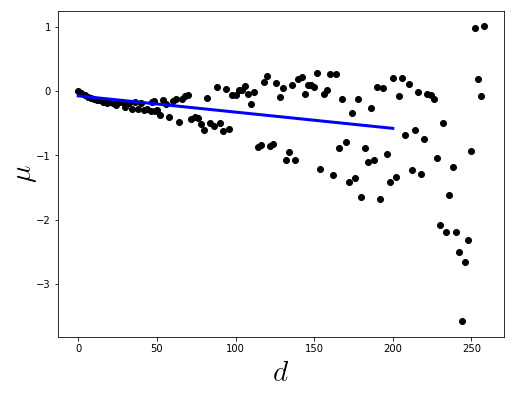

In [109]:
whichN = 'N=500'
whichLetter = 'd'
letterNumber = 20
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/d-tau'+str(letterNumber), smallerThan=200);

Mean squared error: 0.02
Variance score (R^2): 1.00
Line: -0.02τ + 0.378545


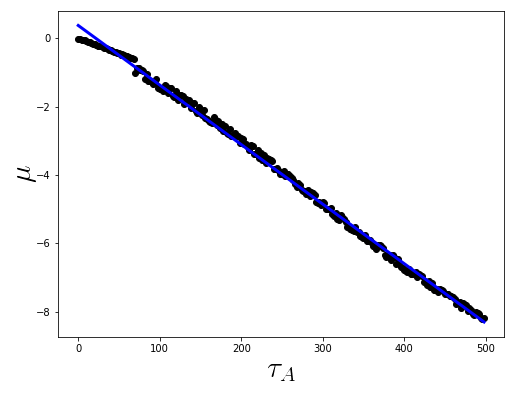

Fig. \ref{fig:lin-skewTo0-N500-tau-d20}  shows how $\mu$ depends on $\tau_A$ change for $ d=498 $. The results are for $\tau_A = 0, 2, \ldots, 20$, and $N = 500$. The blue line depicts linear regression fit for $ \tau_A \le 498 $. The trend line is $-0.02\tau_A +0.38$. The coefficient of determination is $r^2 = 1.00$. 


In [72]:
whichN = 'N=500'
whichLetter = 'tau'
letterNumber = 20
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

figName = 'fig:' + filePrefix + '-N' + str(getN(whichN)) + '-tau-d' + str(letterNumber)
regression = linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/tau-d'+str(letterNumber));
print('Fig. \\ref{%s}  shows how $\\mu$ depends on $\\tau_A$ change for $ d=%d $. The results are for $\\tau_A = 0, 2, \\ldots, %d$, and $N = %d$. The blue line depicts linear regression fit for $ \\tau_A \le %d $. The trend line is $%.2f\\tau_A %+.2f$. The coefficient of determination is $r^2 = %.2f$. ' % 
        (figName, regression['max'], letterNumber, getN(whichN), regression['upto'], regression['slope'], regression['intercept'], regression['r2']));

Mean squared error: 0.14
Variance score (R^2): 0.56
Line: -0.01d + -0.236256


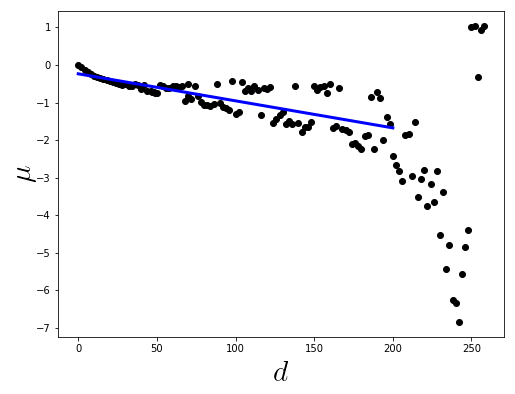

In [111]:
whichN = 'N=500'
whichLetter = 'd'
letterNumber = 50
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/d-tau'+str(letterNumber), smallerThan=200);

Mean squared error: 0.02
Variance score (R^2): 1.00
Line: -0.02τ + 0.300641


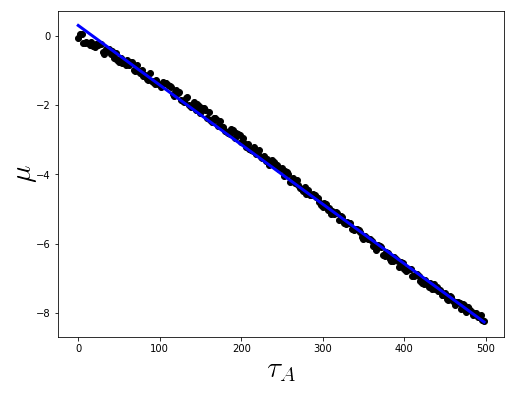

Fig. \ref{fig:lin-skewTo0-N500-tau-d50}  shows how $\mu$ depends on $\tau_A$ change for $ d=498 $. The results are for $\tau_A = 0, 2, \ldots, 50$, and $N = 500$. The blue line depicts linear regression fit for $ \tau_A \le 498 $. The trend line is $-0.02\tau_A +0.30$. The coefficient of determination is $r^2 = 1.00$. 


In [74]:
whichN = 'N=500'
whichLetter = 'tau'
letterNumber = 50
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

figName = 'fig:' + filePrefix + '-N' + str(getN(whichN)) + '-tau-d' + str(letterNumber)
regression = linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/tau-d'+str(letterNumber));
print('Fig. \\ref{%s}  shows how $\\mu$ depends on $\\tau_A$ change for $ d=%d $. The results are for $\\tau_A = 0, 2, \\ldots, %d$, and $N = %d$. The blue line depicts linear regression fit for $ \\tau_A \le %d $. The trend line is $%.2f\\tau_A %+.2f$. The coefficient of determination is $r^2 = %.2f$. ' % 
        (figName, regression['max'], letterNumber, getN(whichN), regression['upto'], regression['slope'], regression['intercept'], regression['r2']));

Mean squared error: 0.02
Variance score (R^2): 0.99
Line: -0.02τ + 0.272824


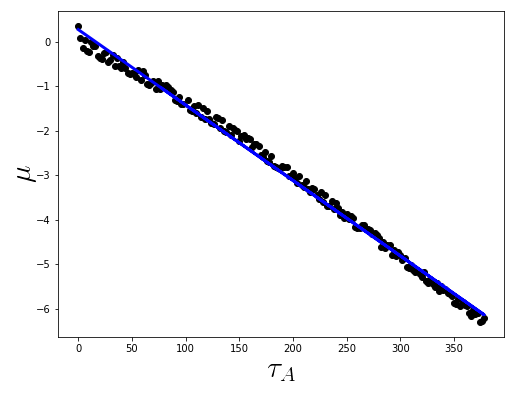

Fig. \ref{fig:lin-skewTo0-N500-tau-d150}  shows how $\mu$ depends on $\tau_A$ change for $ d=378 $. The results are for $\tau_A = 0, 2, \ldots, 150$, and $N = 500$. The blue line depicts linear regression fit for $ \tau_A \le 378 $. The trend line is $-0.02\tau_A +0.27$. The coefficient of determination is $r^2 = 0.99$. 


In [112]:
whichN = 'N=500'
whichLetter = 'tau'
letterNumber = 150
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

figName = 'fig:' + filePrefix + '-N' + str(getN(whichN)) + '-tau-d' + str(letterNumber)
regression = linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/tau-d'+str(letterNumber));
print('Fig. \\ref{%s}  shows how $\\mu$ depends on $\\tau_A$ change for $ d=%d $. The results are for $\\tau_A = 0, 2, \\ldots, %d$, and $N = %d$. The blue line depicts linear regression fit for $ \\tau_A \le %d $. The trend line is $%.2f\\tau_A %+.2f$. The coefficient of determination is $r^2 = %.2f$. ' % 
        (figName, regression['max'], letterNumber, getN(whichN), regression['upto'], regression['slope'], regression['intercept'], regression['r2']));

# Linear, skew45

### N=100

In [115]:
filePrefix = 'lin-skew45'
%run csvFilename.py
csvFilename = createCSVFilename(filePrefix)
csvFilename

{'N=100': {'ds': {'tau=20': '../../csv/N=100/lin-skew45-ds-tau20.csv',
   'tau=50': '../../csv/N=100/lin-skew45-ds-tau50.csv'},
  'taus': {'d=20': '../../csv/N=100/lin-skew45-taus-d20.csv',
   'd=50': '../../csv/N=100/lin-skew45-taus-d50.csv',
   'd=150': '../../csv/N=100/lin-skew45-taus-d150.csv'}},
 'N=300': {'ds': {'tau=20': '../../csv/N=300/lin-skew45-ds-tau20.csv',
   'tau=50': '../../csv/N=300/lin-skew45-ds-tau50.csv'},
  'taus': {'d=20': '../../csv/N=300/lin-skew45-taus-d20.csv',
   'd=50': '../../csv/N=300/lin-skew45-taus-d50.csv',
   'd=150': '../../csv/N=300/lin-skew45-taus-d150.csv'}},
 'N=500': {'ds': {'tau=20': '../../csv/N=500/lin-skew45-ds-tau20.csv',
   'tau=50': '../../csv/N=500/lin-skew45-ds-tau50.csv'},
  'taus': {'d=20': '../../csv/N=500/lin-skew45-taus-d20.csv',
   'd=50': '../../csv/N=500/lin-skew45-taus-d50.csv',
   'd=150': '../../csv/N=500/lin-skew45-taus-d150.csv'}}}

Mean squared error: 0.06
Variance score (R^2): 0.69
Line: -0.03d + -0.571010


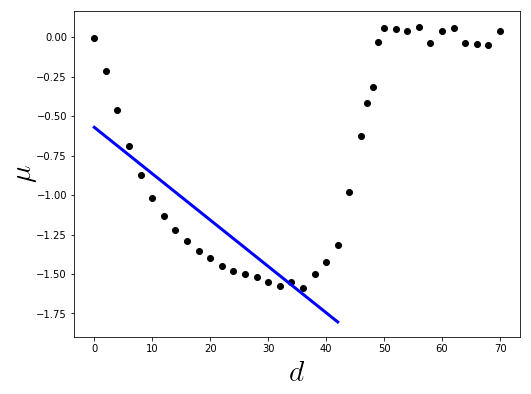

In [77]:
whichN = 'N=100'
whichLetter = 'd'
letterNumber = 50
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/tau-d'+str(letterNumber), forHalfN=True, N=100);

### N=300

Mean squared error: 0.00
Variance score (R^2): 0.93
Line: -0.01d + -0.037046


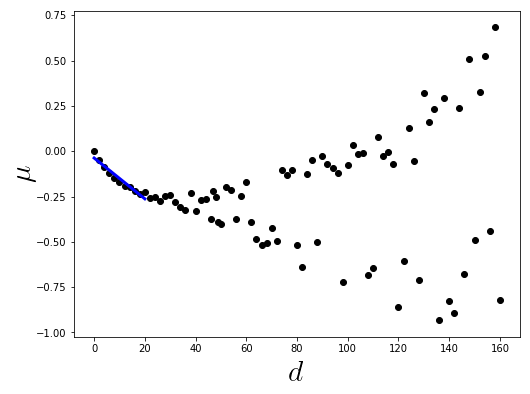

In [116]:
whichN = 'N=300'
whichLetter = 'd'
letterNumber = 20
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/d-tau'+str(letterNumber), smallerThan=20);

Mean squared error: 0.05
Variance score (R^2): 0.97
Line: -0.01τ + -0.275596


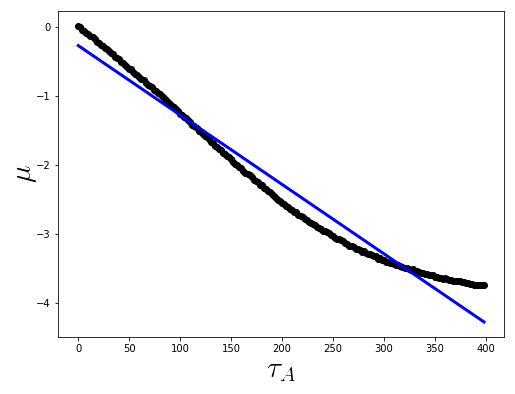

Fig. \ref{fig:lin-skew45-N300-tau-d20}  shows how $\mu$ depends on $\tau_A$ change for $ d=398 $. The results are for $\tau_A = 0, 2, \ldots, 20$, and $N = 300$. The blue line depicts linear regression fit for $ \tau_A \le 398 $. The trend line is $-0.01\tau_A -0.28$. The coefficient of determination is $r^2 = 0.97$. 


In [79]:
whichN = 'N=300'
whichLetter = 'tau'
letterNumber = 20
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

figName = 'fig:' + filePrefix + '-N' + str(getN(whichN)) + '-tau-d' + str(letterNumber)
regression = linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/tau-d'+str(letterNumber));
print('Fig. \\ref{%s}  shows how $\\mu$ depends on $\\tau_A$ change for $ d=%d $. The results are for $\\tau_A = 0, 2, \\ldots, %d$, and $N = %d$. The blue line depicts linear regression fit for $ \\tau_A \le %d $. The trend line is $%.2f\\tau_A %+.2f$. The coefficient of determination is $r^2 = %.2f$. ' % 
        (figName, regression['max'], letterNumber, getN(whichN), regression['upto'], regression['slope'], regression['intercept'], regression['r2']));

Mean squared error: 0.00
Variance score (R^2): 0.95
Line: -0.03d + -0.072262


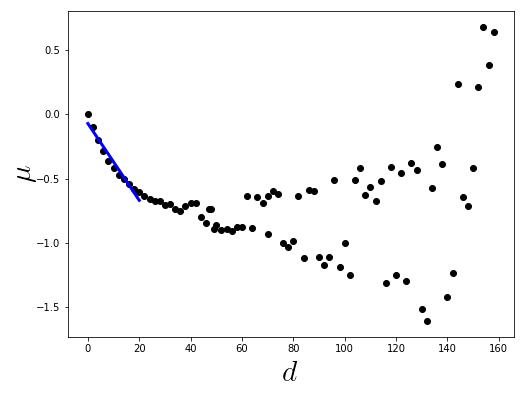

In [117]:
whichN = 'N=300'
whichLetter = 'd'
letterNumber = 50
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/d-tau'+str(letterNumber), smallerThan=20);

Mean squared error: 0.02
Variance score (R^2): 1.00
Line: -0.02τ + 0.352052


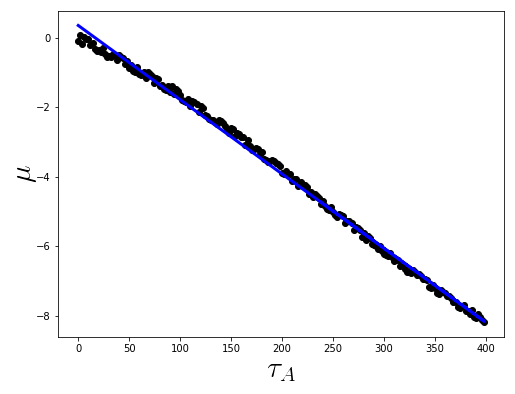

Fig. \ref{fig:lin-skew45-N300-tau-d50}  shows how $\mu$ depends on $\tau_A$ change for $ d=398 $. The results are for $\tau_A = 0, 2, \ldots, 50$, and $N = 300$. The blue line depicts linear regression fit for $ \tau_A \le 398 $. The trend line is $-0.02\tau_A +0.35$. The coefficient of determination is $r^2 = 1.00$. 


In [81]:
whichN = 'N=300'
whichLetter = 'tau'
letterNumber = 50
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

figName = 'fig:' + filePrefix + '-N' + str(getN(whichN)) + '-tau-d' + str(letterNumber)
regression = linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/tau-d'+str(letterNumber));
print('Fig. \\ref{%s}  shows how $\\mu$ depends on $\\tau_A$ change for $ d=%d $. The results are for $\\tau_A = 0, 2, \\ldots, %d$, and $N = %d$. The blue line depicts linear regression fit for $ \\tau_A \le %d $. The trend line is $%.2f\\tau_A %+.2f$. The coefficient of determination is $r^2 = %.2f$. ' % 
        (figName, regression['max'], letterNumber, getN(whichN), regression['upto'], regression['slope'], regression['intercept'], regression['r2']));

### N=500

Mean squared error: 0.00
Variance score (R^2): 0.85
Line: -0.01d + -0.041797


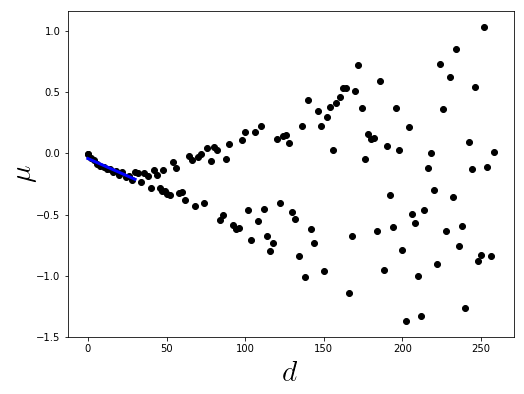

In [118]:
whichN = 'N=500'
whichLetter = 'd'
letterNumber = 20
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/d-tau'+str(letterNumber), smallerThan=30);

Mean squared error: 0.00
Variance score (R^2): 1.00
Line: -0.01τ + -0.059052


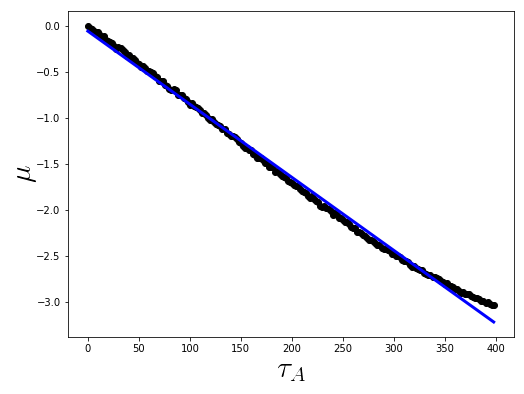

Fig. \ref{fig:lin-skew45-N500-tau-d20}  shows how $\mu$ depends on $\tau_A$ change for $ d=398 $. The results are for $\tau_A = 0, 2, \ldots, 20$, and $N = 500$. The blue line depicts linear regression fit for $ \tau_A \le 398 $. The trend line is $-0.01\tau_A -0.06$. The coefficient of determination is $r^2 = 1.00$. 


In [83]:
whichN = 'N=500'
whichLetter = 'tau'
letterNumber = 20
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

figName = 'fig:' + filePrefix + '-N' + str(getN(whichN)) + '-tau-d' + str(letterNumber)
regression = linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/tau-d'+str(letterNumber));
print('Fig. \\ref{%s}  shows how $\\mu$ depends on $\\tau_A$ change for $ d=%d $. The results are for $\\tau_A = 0, 2, \\ldots, %d$, and $N = %d$. The blue line depicts linear regression fit for $ \\tau_A \le %d $. The trend line is $%.2f\\tau_A %+.2f$. The coefficient of determination is $r^2 = %.2f$. ' % 
        (figName, regression['max'], letterNumber, getN(whichN), regression['upto'], regression['slope'], regression['intercept'], regression['r2']));

Mean squared error: 0.00
Variance score (R^2): 0.93
Line: -0.02d + -0.084237


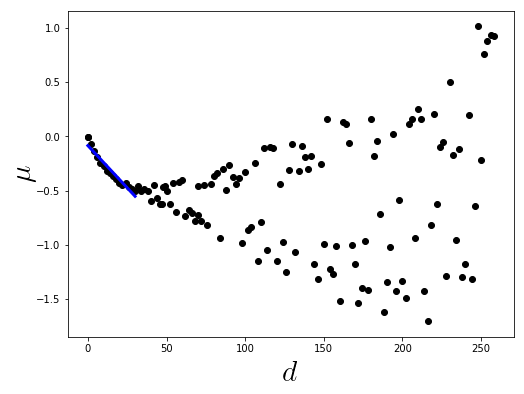

In [119]:
whichN = 'N=500'
whichLetter = 'd'
letterNumber = 50
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/d-tau'+str(letterNumber), smallerThan=30);

Mean squared error: 0.02
Variance score (R^2): 1.00
Line: -0.01τ + 0.296212


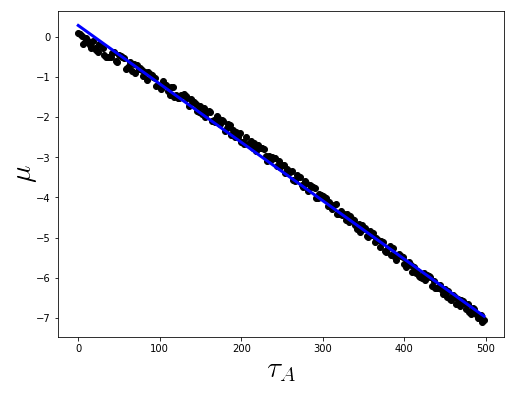

Fig. \ref{fig:lin-skew45-N500-tau-d50}  shows how $\mu$ depends on $\tau_A$ change for $ d=498 $. The results are for $\tau_A = 0, 2, \ldots, 50$, and $N = 500$. The blue line depicts linear regression fit for $ \tau_A \le 498 $. The trend line is $-0.01\tau_A +0.30$. The coefficient of determination is $r^2 = 1.00$. 


In [85]:
whichN = 'N=500'
whichLetter = 'tau'
letterNumber = 50
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

figName = 'fig:' + filePrefix + '-N' + str(getN(whichN)) + '-tau-d' + str(letterNumber)
regression = linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/tau-d'+str(letterNumber));
print('Fig. \\ref{%s}  shows how $\\mu$ depends on $\\tau_A$ change for $ d=%d $. The results are for $\\tau_A = 0, 2, \\ldots, %d$, and $N = %d$. The blue line depicts linear regression fit for $ \\tau_A \le %d $. The trend line is $%.2f\\tau_A %+.2f$. The coefficient of determination is $r^2 = %.2f$. ' % 
        (figName, regression['max'], letterNumber, getN(whichN), regression['upto'], regression['slope'], regression['intercept'], regression['r2']));

Mean squared error: 0.43
Variance score (R^2): 0.95
Line: -0.02τ + 0.497796


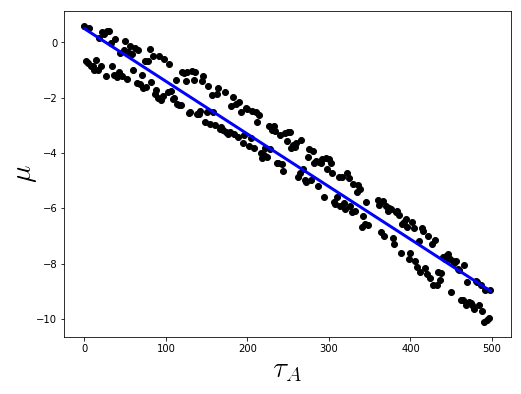

Fig. \ref{fig:lin-skew45-N500-tau-d150}  shows how $\mu$ depends on $\tau_A$ change for $ d=498 $. The results are for $\tau_A = 0, 2, \ldots, 150$, and $N = 500$. The blue line depicts linear regression fit for $ \tau_A \le 498 $. The trend line is $-0.02\tau_A +0.50$. The coefficient of determination is $r^2 = 0.95$. 


In [86]:
whichN = 'N=500'
whichLetter = 'tau'
letterNumber = 150
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

figName = 'fig:' + filePrefix + '-N' + str(getN(whichN)) + '-tau-d' + str(letterNumber)
regression = linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/tau-d'+str(letterNumber));
print('Fig. \\ref{%s}  shows how $\\mu$ depends on $\\tau_A$ change for $ d=%d $. The results are for $\\tau_A = 0, 2, \\ldots, %d$, and $N = %d$. The blue line depicts linear regression fit for $ \\tau_A \le %d $. The trend line is $%.2f\\tau_A %+.2f$. The coefficient of determination is $r^2 = %.2f$. ' % 
        (figName, regression['max'], letterNumber, getN(whichN), regression['upto'], regression['slope'], regression['intercept'], regression['r2']));

# Linear, smooth

### N=100

In [4]:
filePrefix = 'lin-smooth'
%run csvFilename.py
csvFilename = createCSVFilename(filePrefix)
csvFilename

{'N=20': {'ds': {'tau=1': '../csv/N=20/lin-smooth-ds-tau-1.csv',
   'tau=2': '../csv/N=20/lin-smooth-ds-tau-2.csv',
   'tau=3': '../csv/N=20/lin-smooth-ds-tau-3.csv',
   'tau=4': '../csv/N=20/lin-smooth-ds-tau-4.csv',
   'tau=5': '../csv/N=20/lin-smooth-ds-tau-5.csv',
   'tau=6': '../csv/N=20/lin-smooth-ds-tau-6.csv',
   'tau=20': '../csv/N=20/lin-smooth-ds-tau-20.csv',
   'tau=50': '../csv/N=20/lin-smooth-ds-tau-50.csv'},
  'taus': {'d=1': '../csv/N=20/lin-smooth-taus-d-1.csv',
   'd=2': '../csv/N=20/lin-smooth-taus-d-2.csv',
   'd=3': '../csv/N=20/lin-smooth-taus-d-3.csv',
   'd=20': '../csv/N=20/lin-smooth-taus-d-20.csv',
   'd=50': '../csv/N=20/lin-smooth-taus-d-50.csv',
   'd=150': '../csv/N=20/lin-smooth-taus-d-150.csv'}},
 'N=100': {'ds': {'tau=1': '../csv/N=100/lin-smooth-ds-tau-1.csv',
   'tau=2': '../csv/N=100/lin-smooth-ds-tau-2.csv',
   'tau=3': '../csv/N=100/lin-smooth-ds-tau-3.csv',
   'tau=4': '../csv/N=100/lin-smooth-ds-tau-4.csv',
   'tau=5': '../csv/N=100/lin-smooth-d

Mean squared error: 0.26
Variance score (R^2): 0.96
Line: -0.20d + 0.133227


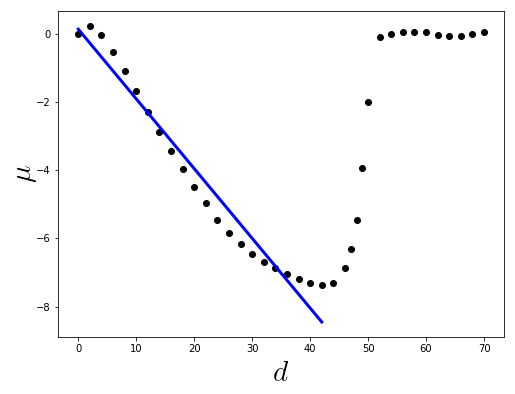

In [88]:
whichN = 'N=100'
whichLetter = 'd'
letterNumber = 50
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/d-tau'+str(letterNumber), forHalfN=True, N=100);

### N=300

Mean squared error: 0.06
Variance score (R^2): 0.95
Line: -0.16d + 0.115944


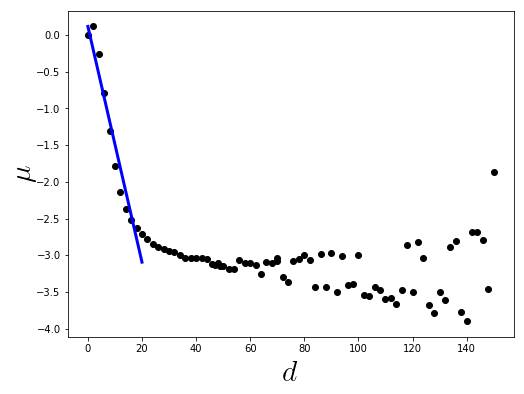

In [5]:
whichN = 'N=300'
whichLetter = 'd'
letterNumber = 20
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, 
                 '../../draft/img/results/'+filePrefix+'/'+whichN+'/d-tau'+str(letterNumber) + '-half', 
                 N=300, showOnlyPointsSmallerThanHalf=True, smallerThan=20);

Mean squared error: 0.00
Variance score (R^2): 1.00
Line: -0.13τ + -0.009369


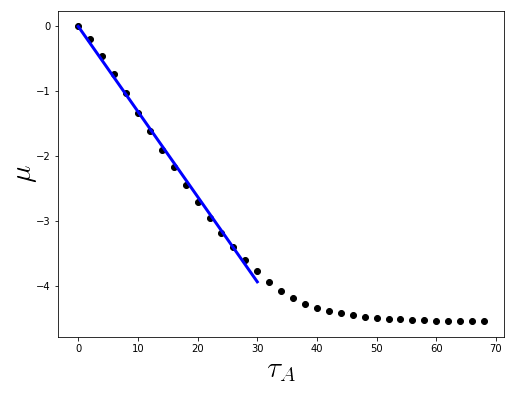

Fig. \ref{fig:lin-smooth-N300-tau-d20}  shows how $\mu$ depends on $\tau_A$ change for $ d=30 $. The results are for $\tau_A = 0, 2, \ldots, 20$, and $N = 300$. The blue line depicts linear regression fit for $ \tau_A \le 30 $. The trend line is $-0.13\tau_A -0.01$. The coefficient of determination is $r^2 = 1.00$. 


In [90]:
whichN = 'N=300'
whichLetter = 'tau'
letterNumber = 20
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

figName = 'fig:' + filePrefix + '-N' + str(getN(whichN)) + '-tau-d' + str(letterNumber)
regression = linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/tau-d'+str(letterNumber), smallerThan=30);
print('Fig. \\ref{%s}  shows how $\\mu$ depends on $\\tau_A$ change for $ d=%d $. The results are for $\\tau_A = 0, 2, \\ldots, %d$, and $N = %d$. The blue line depicts linear regression fit for $ \\tau_A \le %d $. The trend line is $%.2f\\tau_A %+.2f$. The coefficient of determination is $r^2 = %.2f$. ' % 
        (figName, regression['max'], letterNumber, getN(whichN), regression['upto'], regression['slope'], regression['intercept'], regression['r2']));

Mean squared error: 0.06
Variance score (R^2): 0.99
Line: -0.25d + 0.629191


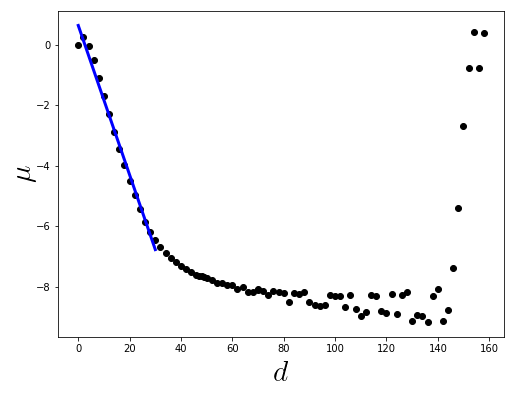

In [122]:
whichN = 'N=300'
whichLetter = 'd'
letterNumber = 50
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/d-tau'+str(letterNumber), smallerThan=30);

Mean squared error: 0.07
Variance score (R^2): 0.99
Line: -0.14τ + -0.247307


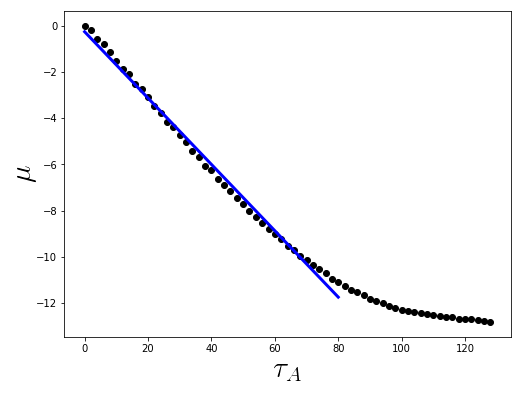

Fig. \ref{fig:lin-smooth-N300-tau-d50}  shows how $\mu$ depends on $\tau_A$ change for $ d=80 $. The results are for $\tau_A = 0, 2, \ldots, 50$, and $N = 300$. The blue line depicts linear regression fit for $ \tau_A \le 80 $. The trend line is $-0.14\tau_A -0.25$. The coefficient of determination is $r^2 = 0.99$. 


In [92]:
whichN = 'N=300'
whichLetter = 'tau'
letterNumber = 50
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

figName = 'fig:' + filePrefix + '-N' + str(getN(whichN)) + '-tau-d' + str(letterNumber)
regression = linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/tau-d'+str(letterNumber), smallerThan=80);
print('Fig. \\ref{%s}  shows how $\\mu$ depends on $\\tau_A$ change for $ d=%d $. The results are for $\\tau_A = 0, 2, \\ldots, %d$, and $N = %d$. The blue line depicts linear regression fit for $ \\tau_A \le %d $. The trend line is $%.2f\\tau_A %+.2f$. The coefficient of determination is $r^2 = %.2f$. ' % 
        (figName, regression['max'], letterNumber, getN(whichN), regression['upto'], regression['slope'], regression['intercept'], regression['r2']));

### N=500

Mean squared error: 0.06
Variance score (R^2): 0.95
Line: -0.16d + 0.117260


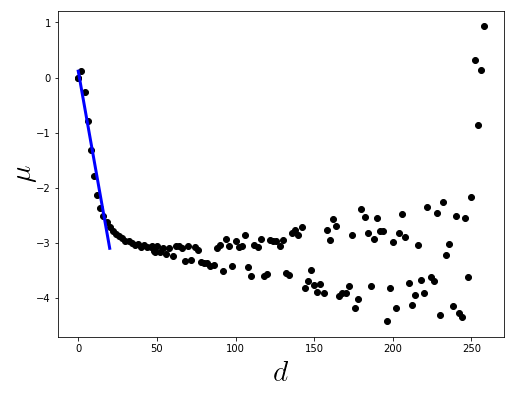

In [123]:
whichN = 'N=500'
whichLetter = 'd'
letterNumber = 20
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/d-tau'+str(letterNumber), smallerThan=20);

Mean squared error: 0.13
Variance score (R^2): 0.94
Line: -0.10τ + -0.473364


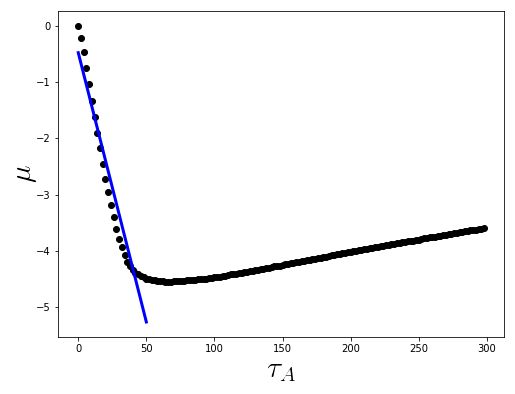

Fig. \ref{fig:lin-smooth-N500-tau-d20}  shows how $\mu$ depends on $\tau_A$ change for $ d=50 $. The results are for $\tau_A = 0, 2, \ldots, 20$, and $N = 500$. The blue line depicts linear regression fit for $ \tau_A \le 50 $. The trend line is $-0.10\tau_A -0.47$. The coefficient of determination is $r^2 = 0.94$. 


In [94]:
whichN = 'N=500'
whichLetter = 'tau'
letterNumber = 20
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

figName = 'fig:' + filePrefix + '-N' + str(getN(whichN)) + '-tau-d' + str(letterNumber)
regression = linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/tau-d'+str(letterNumber), smallerThan=50);
print('Fig. \\ref{%s}  shows how $\\mu$ depends on $\\tau_A$ change for $ d=%d $. The results are for $\\tau_A = 0, 2, \\ldots, %d$, and $N = %d$. The blue line depicts linear regression fit for $ \\tau_A \le %d $. The trend line is $%.2f\\tau_A %+.2f$. The coefficient of determination is $r^2 = %.2f$. ' % 
        (figName, regression['max'], letterNumber, getN(whichN), regression['upto'], regression['slope'], regression['intercept'], regression['r2']));

Mean squared error: 0.06
Variance score (R^2): 0.99
Line: -0.25d + 0.627280


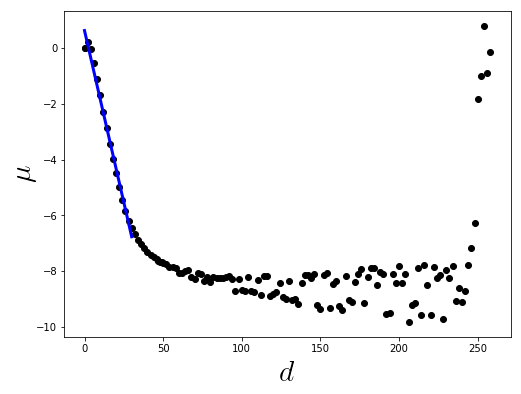

In [124]:
whichN = 'N=500'
whichLetter = 'd'
letterNumber = 50
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/d-tau'+str(letterNumber), smallerThan=30);

Mean squared error: 0.07
Variance score (R^2): 0.99
Line: -0.14τ + -0.221291


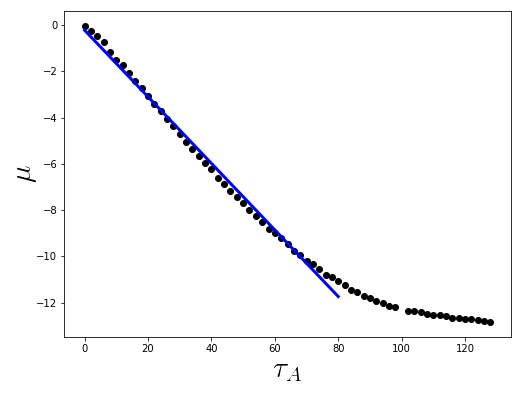

Fig. \ref{fig:lin-smooth-N500-tau-d50}  shows how $\mu$ depends on $\tau_A$ change for $ d=80 $. The results are for $\tau_A = 0, 2, \ldots, 50$, and $N = 500$. The blue line depicts linear regression fit for $ \tau_A \le 80 $. The trend line is $-0.14\tau_A -0.22$. The coefficient of determination is $r^2 = 0.99$. 


In [96]:
whichN = 'N=500'
whichLetter = 'tau'
letterNumber = 50
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

figName = 'fig:' + filePrefix + '-N' + str(getN(whichN)) + '-tau-d' + str(letterNumber)
regression = linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/tau-d'+str(letterNumber), smallerThan=80);
print('Fig. \\ref{%s}  shows how $\\mu$ depends on $\\tau_A$ change for $ d=%d $. The results are for $\\tau_A = 0, 2, \\ldots, %d$, and $N = %d$. The blue line depicts linear regression fit for $ \\tau_A \le %d $. The trend line is $%.2f\\tau_A %+.2f$. The coefficient of determination is $r^2 = %.2f$. ' % 
        (figName, regression['max'], letterNumber, getN(whichN), regression['upto'], regression['slope'], regression['intercept'], regression['r2']));

Mean squared error: 1.14
Variance score (R^2): 0.99
Line: -0.15τ + -1.509916


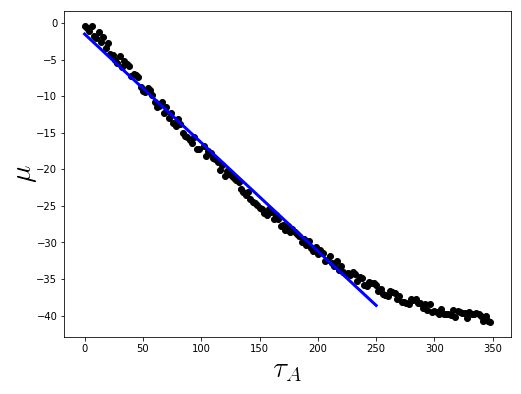

Fig. \ref{fig:lin-smooth-N500-tau-d150}  shows how $\mu$ depends on $\tau_A$ change for $ d=250 $. The results are for $\tau_A = 0, 2, \ldots, 150$, and $N = 500$. The blue line depicts linear regression fit for $ \tau_A \le 348 $. The trend line is $-0.15\tau_A -1.51$. The coefficient of determination is $r^2 = 0.99$. 


In [97]:
whichN = 'N=500'
whichLetter = 'tau'
letterNumber = 150
df = pd.read_csv(csvFilename[whichN][whichLetter + 's'][theOtherLetter(whichLetter)+'='+str(letterNumber)], sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

figName = 'fig:' + filePrefix + '-N' + str(getN(whichN)) + '-tau-d' + str(letterNumber)
regression = linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/'+whichN+'/tau-d'+str(letterNumber), forHalfN=True, N=500);
print('Fig. \\ref{%s}  shows how $\\mu$ depends on $\\tau_A$ change for $ d=%d $. The results are for $\\tau_A = 0, 2, \\ldots, %d$, and $N = %d$. The blue line depicts linear regression fit for $ \\tau_A \le %d $. The trend line is $%.2f\\tau_A %+.2f$. The coefficient of determination is $r^2 = %.2f$. ' % 
        (figName, regression['max'], letterNumber, getN(whichN), regression['upto'], regression['slope'], regression['intercept'], regression['r2']));